In [1]:
import json
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Retrieve data
Read data as JSON

In [2]:
with open('./data/train.json', 'r') as file:
    data = json.load(file)

# Inspect data

Total numerical information

In [3]:
cuisine = set()
ingredients = set()

for dish in data:
    cuisine.add(dish['cuisine'])
    ingredients.update(dish['ingredients'])

print('Total number of data entries:', len(data))

# print(cuisine)
print('Total number of classes:', len(cuisine))

# print(ingredients)
print('Total number of input parameters:', len(ingredients))

labelsToCode = {}
codeToLabel = {}
for elm in cuisine:
    if elm not in labelsToCode:
        code = len(codeToLabel)
        labelsToCode[elm] = code
        codeToLabel[len(codeToLabel)] = elm

inputsToCode = {}
for elm in ingredients:
    if elm not in inputsToCode:
        inputsToCode[elm] = len(inputsToCode)


Total number of data entries: 39774
Total number of classes: 20
Total number of input parameters: 6714


## Check classes balance

<Axes: xlabel='Cuisine'>

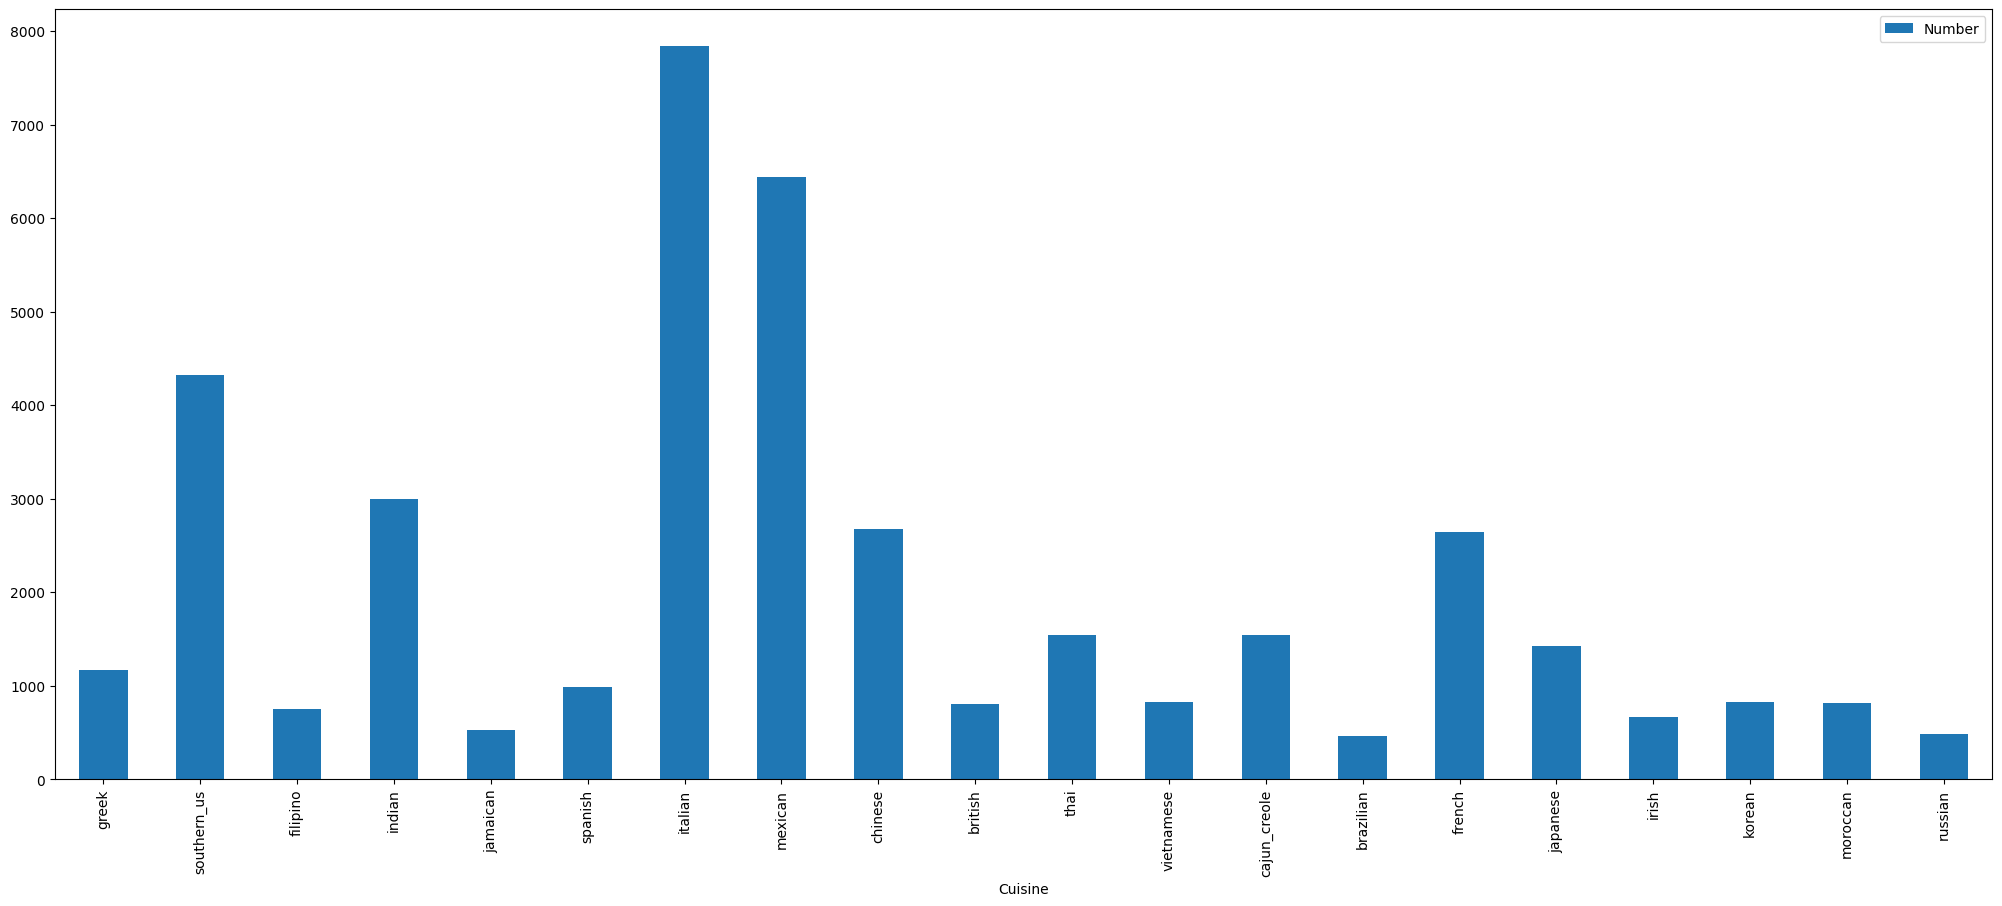

In [4]:
stats = {}
for dish in data:
    label = dish['cuisine']
    if label not in stats:
        stats[label] = 0
    stats[dish['cuisine']] += 1

min = None
for val in stats.values():
    if min is None or val < min:
        min = val

result = pd.DataFrame({'Cuisine': stats.keys(), 'Number': stats.values()})
result.plot(kind = 'bar', x = 'Cuisine', y = 'Number', figsize=(25, 10))

# Transform data

* Map predictors to binary descriptors {0, 1}
* Map labels to {0, 1, ..., 19}

In [5]:
x = []
y = np.array([], dtype=int)

for dish in data:
    descriptors = np.zeros(len(ingredients), dtype=int)
    for elm in dish['ingredients']:
        code = inputsToCode[elm]
        descriptors[code] = 1
    x.append(descriptors)
    y = np.append(y, labelsToCode[dish['cuisine']])

x = np.array(x)

## Split data into train/test sets

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
print('Number of train entires: ', len(x_train))
print('Number of test entries:', len(x_test))

Number of train entires:  31819
Number of test entries: 7955


In [7]:
x_train_reduced_1, x_train_reduced_2, y_train_reduced_1, y_train_reduced_2 = train_test_split(x_train, y_train, train_size=0.6, test_size=0.2)
print('Number of reduced (1) entires: ', len(x_train_reduced_1))
print('Number of reduced (2) entries:', len(x_train_reduced_2))

Number of reduced (1) entires:  19091
Number of reduced (2) entries: 6364


### Define response visualization function

In [8]:
def printYStats(y):
    stats = {}
    for elm in y:
        label = codeToLabel[elm]
        if label not in stats:
            stats[label] = 0
        stats[label] += 1
    print(stats)
    result = pd.DataFrame({'Class': stats.keys(), 'Number': stats.values()})
    result.plot(kind = 'bar', x = 'Class', y = 'Number', figsize=(25, 10))

## Check train/test sets stratification

              Train  Test
brazilian       387    80
chinese        2131   542
mexican        5130  1308
filipino        605   150
french         2099   547
moroccan        621   200
southern_us    3448   872
indian         2409   594
italian        6321  1517
thai           1215   324
japanese       1146   277
korean          665   165
vietnamese      674   151
cajun_creole   1221   325
jamaican        424   102
british         651   153
greek           973   202
russian         404    85
spanish         770   219
irish           525   142


<Axes: >

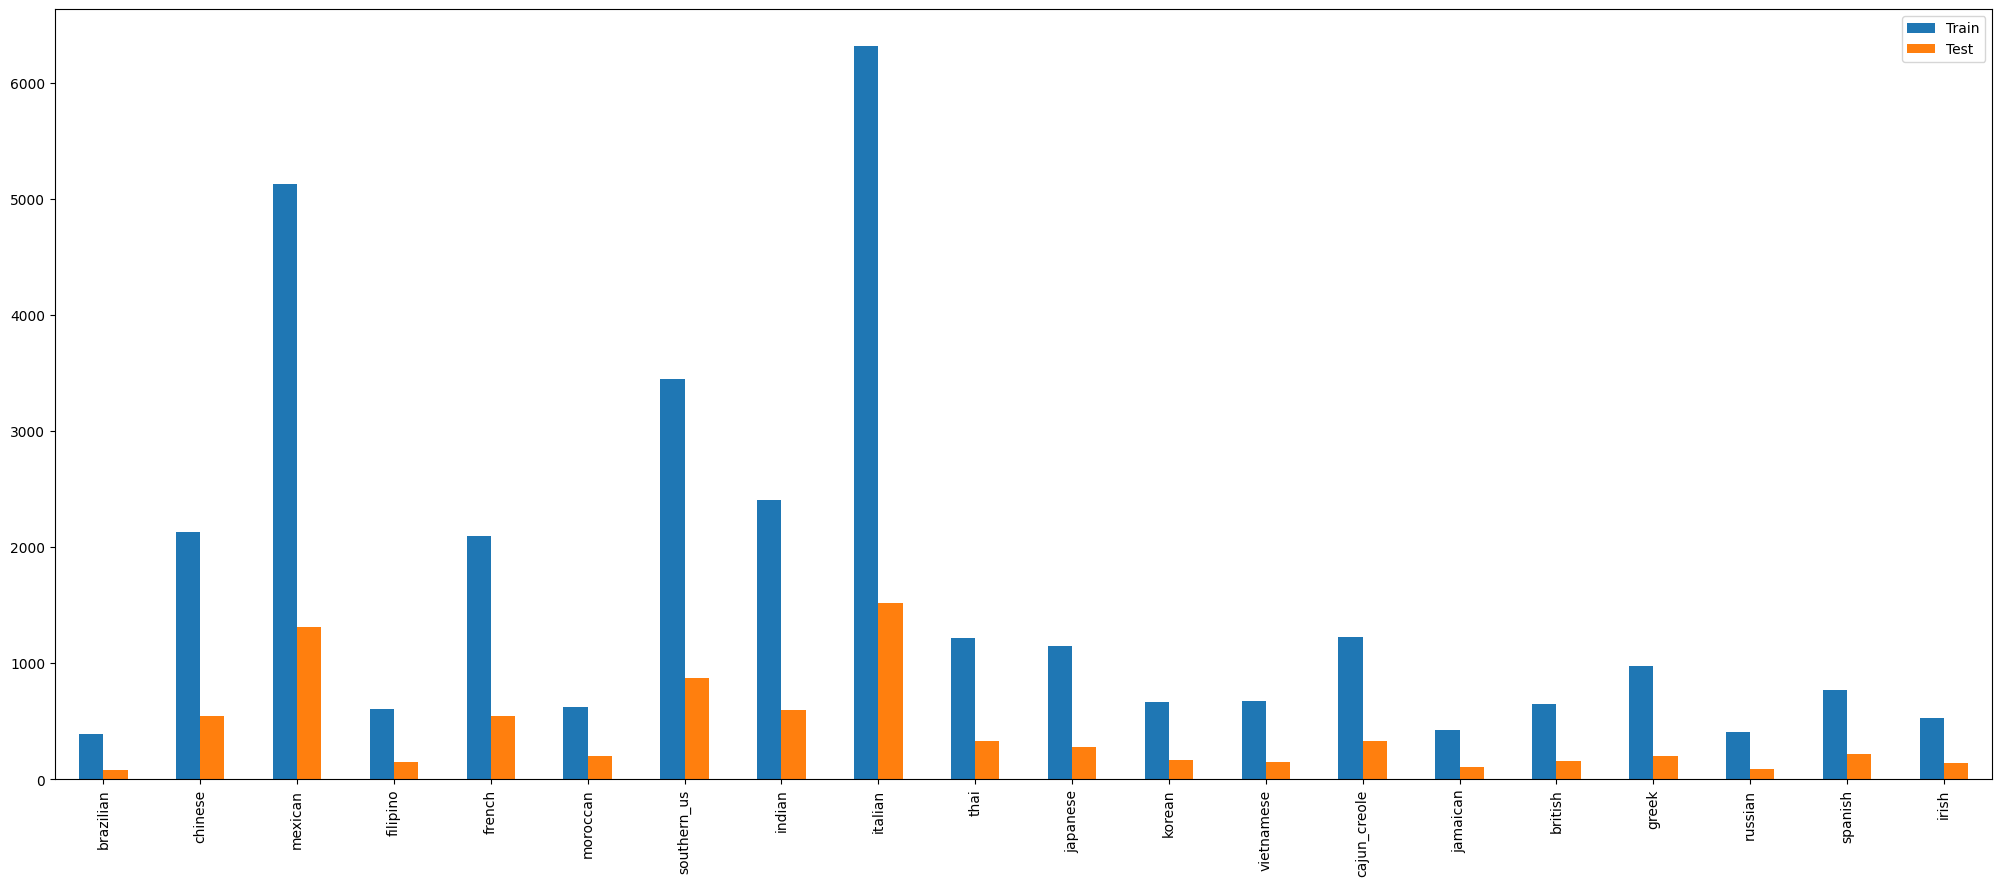

In [9]:
stats = {}
for elm in y_train:
    label = codeToLabel[elm]
    if label not in stats:
        stats[label] = [0, 0]
    stats[label][0] += 1

for elm in y_test:
    label = codeToLabel[elm]
    if label not in stats:
        stats[label] = [0, 0]
    stats[label][1] += 1

result = pd.DataFrame(stats).transpose()
result.rename(columns={0:'Train', 1:'Test'}, inplace=True)
print(result)
result.plot(kind='bar', figsize=(25, 10))

## Fit model to train data

* Use `class_wight='balanced'` for class balancing

In [10]:
modelLR = LogisticRegression(max_iter=100, class_weight='balanced', verbose=1).fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\herman-rog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.1s finished


In [11]:
modelRF = RandomForestClassifier(class_weight='balanced', verbose=1).fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished


In [12]:
modelLR_r1 = LogisticRegression(max_iter=100, class_weight='balanced', verbose=1).fit(x_train_reduced_1, y_train_reduced_1)
modelLR_r2 = LogisticRegression(max_iter=100, class_weight='balanced', verbose=1).fit(x_train_reduced_2, y_train_reduced_2)
modelRF_r1 = RandomForestClassifier(class_weight='balanced', verbose=1).fit(x_train_reduced_1, y_train_reduced_1)
modelRF_r2 = RandomForestClassifier(class_weight='balanced', verbose=1).fit(x_train_reduced_2, y_train_reduced_2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\herman-rog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[P

In [13]:
lr_s = modelLR.score(x_test, y_test)
lr_s_r1 = modelLR_r1.score(x_test, y_test)
lr_s_r2 = modelLR_r2.score(x_test, y_test)

rf_s = modelRF.score(x_test, y_test)
rf_s_r1 = modelRF_r1.score(x_test, y_test)
rf_s_r2 = modelRF_r2.score(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


<Axes: >

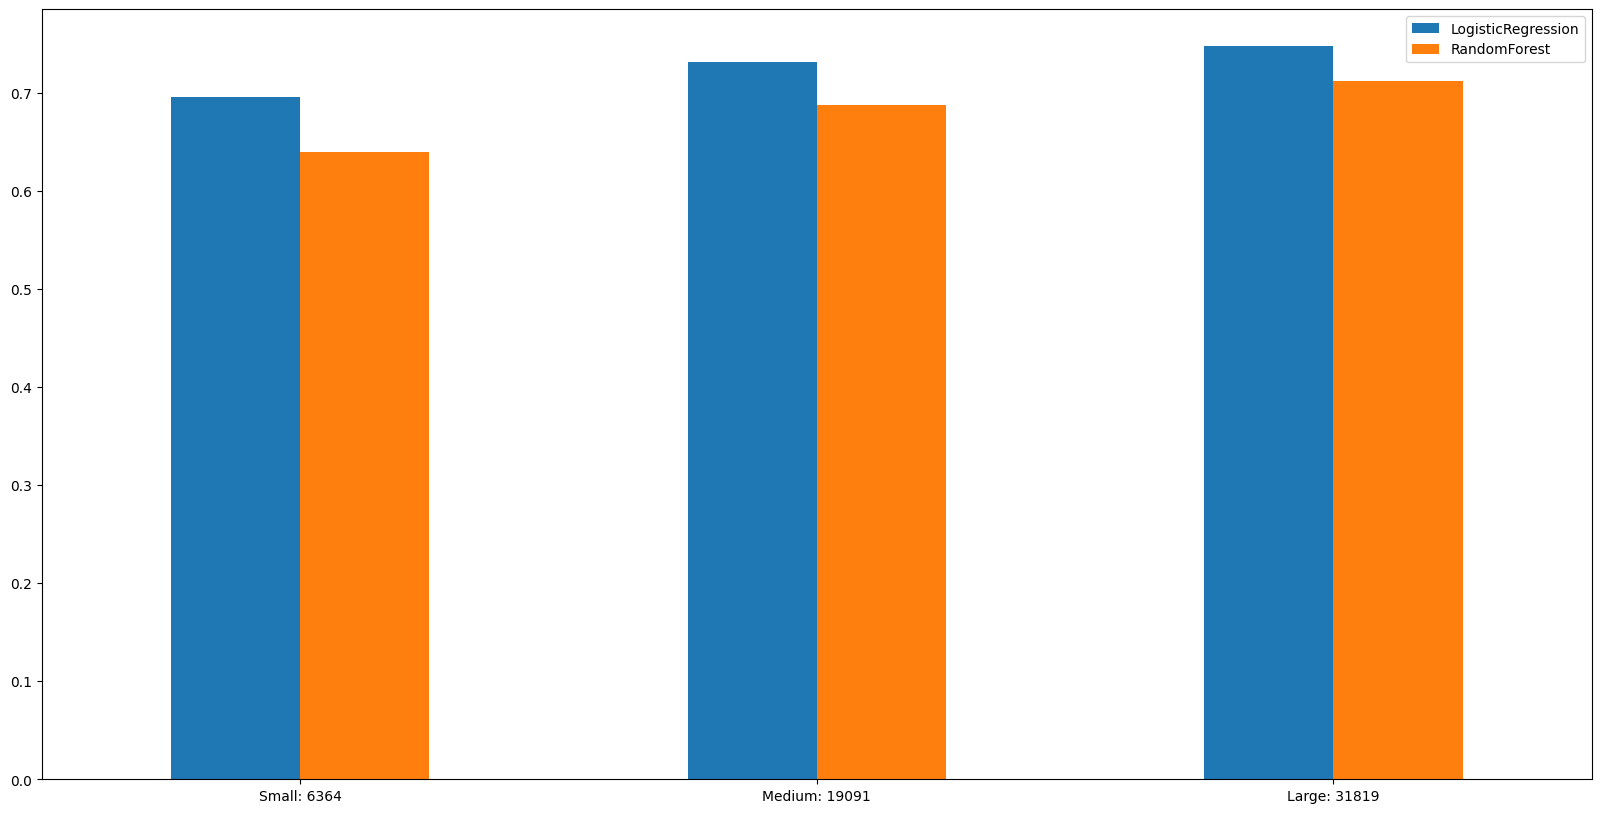

In [14]:
result = pd.DataFrame({'LogisticRegression': [lr_s_r2, lr_s_r1, lr_s], 'RandomForest': [rf_s_r2, rf_s_r1, rf_s]})
result.rename(index={0: 'Small: ' + str(len(x_train_reduced_2)), 1: 'Medium: ' + str(len(x_train_reduced_1)), 2: 'Large: ' + str(len(x_train))}, inplace=True)
result.plot(kind='bar', rot=0, figsize=(20, 10))

